<a href="https://colab.research.google.com/github/KhamdGek/ML-W-PYTHON/blob/master/ML_assignment1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> # **DESCISION TREE VS. RANDOM FOREST ON AUTO MPG**





# **LIBRARY IMPORT**

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns     
sns.set()
import statsmodels as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV  # for data splitting and parameter tuning
from sklearn.tree import DecisionTreeRegressor  # enables us to perform regression using a decision tree
from sklearn.ensemble import RandomForestRegressor # ensemble methods for regression
from sklearn.metrics import r2_score,mean_squared_error   # for scoring the model and calculating the mean squared error
from sklearn import preprocessing  # for data preprocessing and scaling
import warnings
warnings.filterwarnings('ignore')


# **DATA IMPORT**

In [68]:
from google.colab import files
uploaded = files.upload()


Saving auto-mpg.csv to auto-mpg (2).csv


In [69]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['auto-mpg.csv']))
df1.drop(df1.columns[9:],axis=1,inplace=True)


# **DATA CLEANING**

1. REMOVING SOME NON IMPORTANT COLOMNS.
2. SPLITTING THE DATA INTO TRAIN TEST WITH 70/30
3. RANDOM SHUFFLING THE DATA AND STORING INTO THREE STIRNGS

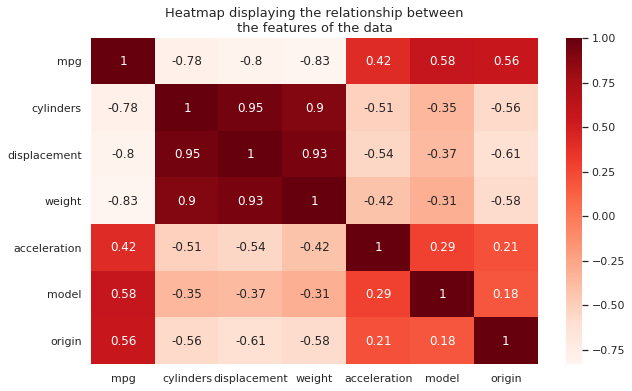

In [70]:
# Let's visualize the relationships between the Mileage Per Galon(mpg) of a car and the other features.
plt.figure(figsize=(10,6))
sns.heatmap(df1.corr(),cmap=plt.cm.Reds,annot=True)
plt.title('Heatmap displaying the relationship between\nthe features of the data',fontsize=13)
plt.show()

# **NON-IMPORTANT COLOMN REMOVAL TO IMPROVE ACCURACY**

In [71]:
df1=df1.drop(['cylinders','displacement','weight','car'],axis=1)
# check missing values in variables
df1.isnull().sum()
# we can see that the odd value is '?' representing null
# so we now change it to NaN value and fill the spot with the mean horsepower
df1.horsepower = df1.horsepower.str.replace('?','NaN').astype(float)
df1.horsepower.fillna(df1.horsepower.mean(),inplace=True)
df1.horsepower = df1.horsepower.astype(int)


# **DATA SHUFFLING**

In [72]:
import random
from random import shuffle
shuffled_df = df1.sample(frac=1)
shuffled_df2 = df1.sample(frac=1)
shuffled_df3 = df1.sample(frac=1)
shuffled_df.to_csv("auto-mpg1.csv", index=False)
shuffled_df2.to_csv("auto-mpg2.csv", index=False)
shuffled_df3.to_csv("auto-mpg3.csv", index=False)
df1=pd.read_csv("auto-mpg1.csv")
df2=pd.read_csv("auto-mpg2.csv")
df3=pd.read_csv("auto-mpg3.csv")

In [73]:
df1.head() 

,mpg,horsepower,acceleration,model,origin
0,28.0,88,19.6,82,1
1,17.7,165,13.4,78,1
2,12.0,180,12.5,73,1
3,18.5,150,13.0,79,1
4,40.8,65,19.2,80,3


In [74]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   horsepower    398 non-null    int64  
 2   acceleration  398 non-null    float64
 3   model         398 non-null    int64  
 4   origin        398 non-null    int64  
dtypes: float64(2), int64(3)
memory usage: 15.7 KB


In [75]:
# let's print the summary statistics of the data
display(df1.describe())

,mpg,horsepower,acceleration,model,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,104.462312,15.568090,76.010050,1.572864
std,7.815984,38.199230,2.757689,3.697627,0.802055
min,9.000000,46.000000,8.000000,70.000000,1.000000
25%,17.500000,76.000000,13.825000,73.000000,1.000000
50%,23.000000,95.000000,15.500000,76.000000,1.000000
75%,29.000000,125.000000,17.175000,79.000000,2.000000
max,46.600000,230.000000,24.800000,82.000000,3.000000


In [76]:
from statsmodels.stats.outliers_influence import variance_inflation_factor  # we will need vif for checking multicollinearity
# Let's do the variance inflation factor method again after doing a feature selection....
X1 = sm.tools.add_constant(df1) 
X1.head()

,const,mpg,horsepower,acceleration,model,origin
0,1.0,28.0,88,19.6,82,1
1,1.0,17.7,165,13.4,78,1
2,1.0,12.0,180,12.5,73,1
3,1.0,18.5,150,13.0,79,1
4,1.0,40.8,65,19.2,80,3


In [77]:
X = df1.drop('mpg',axis=1)
X2 = df2.drop('mpg',axis=1)
X3 = df3.drop('mpg',axis=1)  # create a DataFrame of independent variables
y = df1.mpg   # create a series of the dependent variable
y2= df2.mpg 
y3= df3.mpg 

In [78]:
X.head()

,horsepower,acceleration,model,origin
0,88,19.6,82,1
1,165,13.4,78,1
2,180,12.5,73,1
3,150,13.0,79,1
4,65,19.2,80,3


In [79]:
y.head()

0    28.0
1    17.7
2    12.0
3    18.5
4    40.8
Name: mpg, dtype: float64

# **TRAIN/TEST SPLIT INTO 70/30 RATIO**

In [80]:
# split the unscaled/original X and y data into training and testing data
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.3)
# split the unscaled/original X and y data into training and testing data
xtrain2,xtest2,ytrain2,ytest2 = train_test_split(X2,y2,test_size=.3)
# split the unscaled/original X and y data into training and testing data
xtrain3,xtest3,ytrain3,ytest3 = train_test_split(X3,y3,test_size=.3)

# **Decision Tree regressor**

# Decision Tree Regressor **MODEL FITTING**

In [81]:
dtree = DecisionTreeRegressor() # initialize a DecisionTreeRegressor model
params = {'max_features':['auto','sqrt','log2'],
         'min_samples_split':[2,3,4,5,6,7,8,9],
         'min_samples_leaf':[1,2,3,4,5,6,7,8,9],
         'max_depth':[2,3,4,5,6,7]}                # define the hyperparameters

In [82]:
tree_search = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search
tree_search.fit(xtrain,ytrain)   # fit the model
tree_search2 = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search
tree_search2.fit(xtrain2,ytrain2)   # fit the model
tree_search3 = GridSearchCV(dtree,params,cv=5,n_jobs=-1)  # initialize the grid search
tree_search3.fit(xtrain3,ytrain3)   # fit the model
tree_pred = tree_search.predict(xtest)  # make predictions with the model
tree_pred2 = tree_search2.predict(xtest2)  # make predictions with the model
tree_pred3 = tree_search3.predict(xtest3)  # make predictions with the model

# **RANDOM FOREST**

# RANDOM FOREST **MODEL FITTING**

In [83]:
# we now fit a RandomForestRegressor model and perform a grid search to find the best 
# parameters
forest = RandomForestRegressor()
# we add the n_estimators parameter in our previous parameter dictionary
params['n_estimators'] = [100,200,300,400,500]

In [84]:
forest_search = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,n_iter=50)     # initialize the search 
forest_search.fit(xtrain,ytrain)  # fit the model
forest_pred = forest_search.predict(xtest)  # make prediction with the model
forest_search2 = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,n_iter=50)     # initialize the search 
forest_search2.fit(xtrain2,ytrain2)  # fit the model
forest_pred2 = forest_search2.predict(xtest2)  # make prediction with the model
forest_search3 = RandomizedSearchCV(forest,params,cv=5,n_jobs=-1,n_iter=50)     # initialize the search 
forest_search3.fit(xtrain3,ytrain3)  # fit the model
forest_pred3 = forest_search3.predict(xtest3)  # make prediction with the model

# **CONCLUSION DESCICION TREE VS. RANDOM FOREST**

In [85]:
number_list = [tree_search3.score(xtrain3,ytrain3),tree_search2.score(xtrain2,ytrain2),tree_search.score(xtrain,ytrain)]
avg = sum(number_list)/len(number_list)
print("The average Train set score for Descision tree is ", round(avg,2))
number_list2 = [tree_search3.score(xtest3,ytest3),tree_search2.score(xtest2,ytest2),tree_search.score(xtest,ytest)]
avg = sum(number_list2)/len(number_list2)
print("The average Test set score for Descision tree is ", round(avg,2))
number_list3 = [(r2_score(ytest3,tree_pred3)),(r2_score(ytest2,tree_pred2)),(r2_score(ytest,tree_pred))]
avg = sum(number_list3)/len(number_list3)
print("The average overall model accuracy score for Descision tree is ", round(avg,2))

The average Train set score for Descision tree is  0.84
The average Test set score for Descision tree is  0.73
The average overall model accuracy score for Descision tree is  0.73


In [86]:
number_list4 = [(forest_search.score(xtrain,ytrain)),(forest_search2.score(xtrain2,ytrain2)),(forest_search3.score(xtrain3,ytrain3))]
avg = sum(number_list4)/len(number_list4)
print("The average Train set score for Random Forest is ", round(avg,2))
number_list5 = [forest_search3.score(xtest3,ytest3),forest_search2.score(xtest2,ytest2),forest_search.score(xtest,ytest)]
avg = sum(number_list5)/len(number_list5)
print("The average Test set score for Random forest is", round(avg,2))
number_list6 = [r2_score(ytest3,forest_pred3),r2_score(ytest2,forest_pred2),r2_score(ytest,forest_pred)]
avg = sum(number_list6)/len(number_list6)
print("The average overall model accuracy score for random forest is ", round(avg,2))

The average Train set score for Random Forest is  0.92
The average Test set score for Random forest is 0.84
The average overall model accuracy score for random forest is  0.84
